# VRP with 2-stage approach

In [1]:
from edge_model import EdgeTrainer
from util import *
from heuristic.heuristic_solver import HeuristicSolver


In [2]:
# load the autoreload extension
%load_ext autoreload
# set the level of reloading
%autoreload 2

## Parse data

In [3]:
all_vrp_instances = [parse_datafile(f'../data/cvrp_1000_25_4_8_0.1/instance_{i}') for i in range(1000)]

Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_0...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_1...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_2...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_3...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_4...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_5...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_6...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_7...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_8...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_9...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_10...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_11...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_12...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_13...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_14...
Parsing datafile: ../data/cvrp_1000_25_4_8_0.1/instance_15...
Parsing datafile: 

## Train model

In [4]:
from tqdm import tqdm

# solve the VRPs with the actual edge costs and save the solutions
for vrp in tqdm(all_vrp_instances):
    solver = HeuristicSolver(vrp)
    # solver = GurobiSolver(vrp)
    solver.solve()
    vrp.actual_solution = solver.get_decision_variables()
    vrp.actual_obj = solver.get_actual_objective()

100%|██████████| 1000/1000 [01:42<00:00,  9.72it/s]


In [7]:
vrp_instances_train = all_vrp_instances[:800]
vrp_instances_test = all_vrp_instances[800:]

trainer = EdgeTrainer(vrp_instances_train, vrp_instances_test, lr=1e-1)
trainer.train()

Epoch 0: Train Loss: 54847432878.78533 | Test Loss: 49031068368.8384
Epoch 1: Train Loss: 54769754552.45226 | Test Loss: 48955173986.4192
Epoch 2: Train Loss: 54694818148.7932 | Test Loss: 48881891180.10187
Epoch 3: Train Loss: 54624172095.27993 | Test Loss: 48812905465.59627
Epoch 4: Train Loss: 54556667353.26933 | Test Loss: 48746383822.78347
Epoch 5: Train Loss: 54490190121.35094 | Test Loss: 48682335523.672
Epoch 6: Train Loss: 54427531981.1152 | Test Loss: 48621684395.1744
Epoch 7: Train Loss: 54368172081.74707 | Test Loss: 48563941172.04
Epoch 8: Train Loss: 54309834684.147736 | Test Loss: 48507668580.5856
Epoch 9: Train Loss: 54257451976.08587 | Test Loss: 48456028181.94987
Epoch 10: Train Loss: 54206219420.99094 | Test Loss: 48406377638.88427
Epoch 11: Train Loss: 54155657556.31786 | Test Loss: 48357487303.41013
Epoch 12: Train Loss: 54110037873.73333 | Test Loss: 48312904394.644264
Epoch 13: Train Loss: 54064420600.350136 | Test Loss: 48269760591.98507
Epoch 14: Train Loss: 54

KeyboardInterrupt: 

## Test model

Testing example instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_800, predicted cost: 22339.5546875, actual cost: 9092.114340743805
Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-16
Drawing actual solution


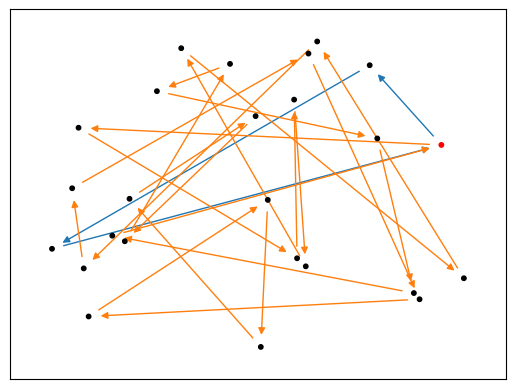

Drawing predicted solution


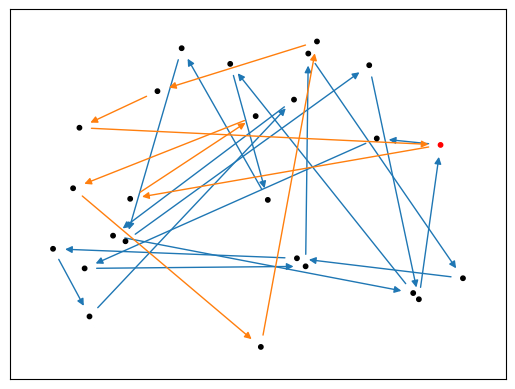

Actual edges (26): [0 -> 7, 0 -> 8, 1 -> 24, 2 -> 3, 3 -> 9, 4 -> 10, 5 -> 14, 6 -> 2, 7 -> 21, 8 -> 12, 9 -> 0, 10 -> 17, 11 -> 4, 12 -> 15, 13 -> 5, 14 -> 22, 15 -> 19, 16 -> 13, 17 -> 23, 18 -> 11, 19 -> 18, 20 -> 6, 21 -> 0, 22 -> 1, 23 -> 16, 24 -> 20]
Predicted edges (26): [0 -> 2, 0 -> 22, 1 -> 17, 2 -> 10, 3 -> 20, 4 -> 6, 5 -> 18, 6 -> 8, 7 -> 16, 8 -> 0, 9 -> 3, 10 -> 19, 11 -> 12, 12 -> 21, 13 -> 15, 14 -> 4, 15 -> 9, 16 -> 0, 17 -> 14, 18 -> 24, 19 -> 23, 20 -> 5, 21 -> 13, 22 -> 1, 23 -> 11, 24 -> 7]
Correct edges (1): {22 -> 1}


In [8]:
test_and_draw(trainer, vrp_instances_test[0])

In [9]:

test(trainer, vrp_instances_test, HeuristicSolver)

Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_800, accuracy: 0.12, actual cost: 16566.11061380817, predicted cost: 715865.9217067783
Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_801, accuracy: 0.3342857142857143, actual cost: 65146.54111796203, predicted cost: 981762.4759617795
Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_802, accuracy: 0.4057142857142857, actual cost: 101359.58370778066, predicted cost: 3058194.476216265
Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_803, accuracy: 0.44417582417582413, actual cost: 113264.00216435539, predicted cost: 3814367.1104112766
Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_804, accuracy: 0.5210989010989011, actual cost: 128188.84103008494, predicted cost: 4917763.890285773
Parsed instance VRP instance: ../data/cvrp_1000_25_4_8_0.1/instance_805, accuracy: 0.5581359381359381, actual cost: 151925.61859231736, predicted cost: 5574135.3290